In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings(action='ignore')

#DecisionTree Classifier 생성 
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리 
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습 
dt_clf.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\python_ml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\Users\user\anaconda3\envs\python_ml\lib\site-packages\sklearn\feature_extraction\dict_vectorizer.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
C:\Users\user\anaconda3\envs\python_ml\lib\site-packages\sklearn\model_selection\_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

일단 시각화를 위해서는 결정트리가 만들어져야 하므로 DecisionTreeClassifier 객체를 생성하고 

해당 데이터로 학습한다. 

In [5]:
from sklearn.tree import export_graphviz

#export_graphviz() 의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file= 'tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled = True)

export_graphviz를 통해서 해당 트리를 구현한 파일을 저장한 후 graphviz의 Source를 통해서 주피터 노트북 상에서 시각화 한다. 

In [6]:
import graphviz

#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

결정 트리는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 

중요한 몇개의 피처가 명확한 규칙 트리를 만드는데 크게 기여하고, 이상치(Outlier)에 강한 모델을 만들수 있기 때문이다.

그렇다면 **피처의 중요도**를 아는것 또한 매우 중요하다. 

이것은 DecisionTreeClassifier 객체의 **feature_importances_** 속성으로 제공한다. 


feature_importances_는 ndarray 형태로 값을 반환하며 피치 순서대로 값이 할당된다. 

이 떄, 값이 높을수록 피처의 중요도가 높다는 의미이다. 

Feature importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


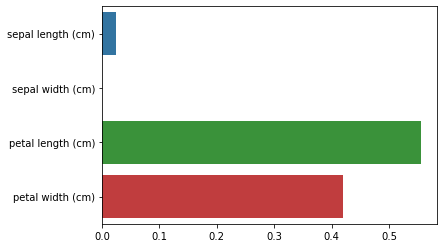

In [5]:
import seaborn as sns
import numpy as np 
%matplotlib inline

#feature importance 추출 
print("Feature importances : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature별 importance 매핑 
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
    

#feature importance를 column 별로 시각화하기 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 과적합 문제 시각화 

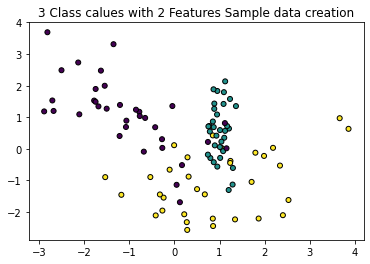

In [7]:
from sklearn.datasets import make_classification 
import matplotlib.pyplot as plt
%matplotlib inline


plt.title("3 Class calues with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 위형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state = 0 )

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [8]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

NameError: name 'np' is not defined

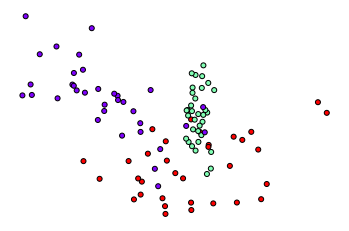

In [9]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)


그림을 보면 가끔가다가 분홍색 길쭉한 직사각형들이 종종 보인다. 

이것들은 이상치(Outlier)로 인해서 생성되는 부분이므로, 이런것들을 없애주는 작업이 필요하다. 

NameError: name 'np' is not defined

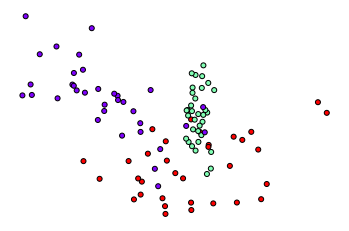

In [10]:
#min_samples_leaf=6 으로 트리 생성 조건을 제약한 결정 경계 시각화 
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

보면 해당 영역에 다른 값이 들어있음에도 불구하고, 비교적 영역이 깔끔하게 잘리는 것을 확인할 수 있다.


# UCI 실습 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features,txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header = None, names=['column_index', 'column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출 
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처 명에서 10개만 추출 : ', feature_name[:10])

전체 피처 명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중폭된 피처명을 본 결과 총 42개의 피처 명이 중복되어 있는 것을 알 수 있다. 

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [14]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [14]:
print('##학습 피처 데이터 셋 info()')
print(X_train.info())

##학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7352 entries, (0.28858451, -0.020294171, -0.13290514, -0.9952786, -0.98311061, -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378, -0.56737807, -0.74441253, 0.85294738, 0.68584458, 0.81426278, -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081, -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187, 0.92929351, -0.85301114, 0.35990976, -0.058526382, 0.25689154, -0.22484763, 0.26410572, -0.09524563, 0.27885143, -0.46508457, 0.49193596, -0.19088356, 0.37631389, 0.43512919, 0.66079033, 0.96339614, -0.14083968, 0.11537494, -0.98524969, -0.98170843, -0.87762497, -0.98500137, -0.98441622, -0.89467735, 0.89205451, -0.16126549, 0.12465977, 0.97743631, -0.12321341, 0.05648273400000001, -0.37542596, 0.89946864, -0.97090521, -0.97551037, -0.98432539, -0.98884915, -0.91774264, -1.0, -1.0, 0.11380614, -0.590425, 0.5911463, -0.59177346, 0.59246928, -0.74544878, 0.72086167, -0.71237239, 0.7113000

In [15]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정 
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.3254
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 516, 'splitter': 'best'}
